# <center>Prediction using Unsupervised ML</center>

## Problem Statement

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
* Use R or Python or perform this task
* Dataset : https://bit.ly/3kXTdox

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns = 'Id',axis = 1, inplace =True)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: >

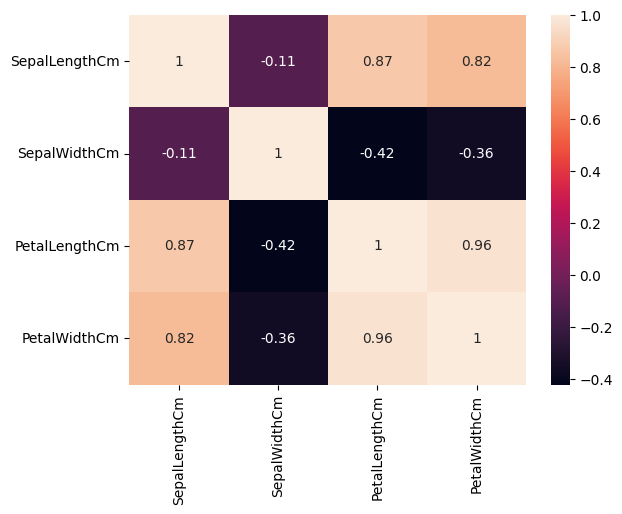

In [8]:
sns.heatmap(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr(),annot = True)

Text(0.5, 1.0, 'Histogram of petallength by species')

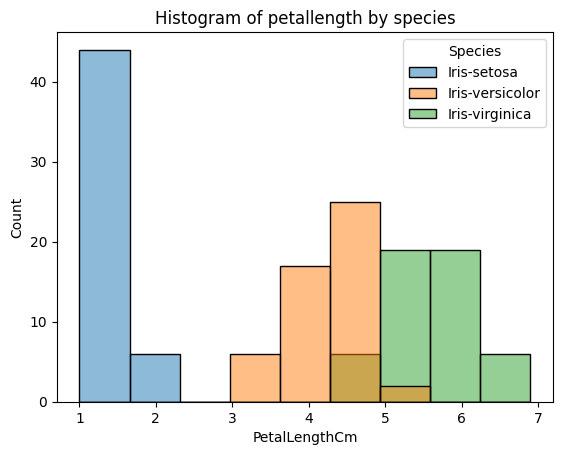

In [10]:
sns.histplot(x = 'PetalLengthCm', data = df, hue = 'Species')
plt.title('Histogram of petallength by species')

In [11]:
from sklearn.cluster import KMeans

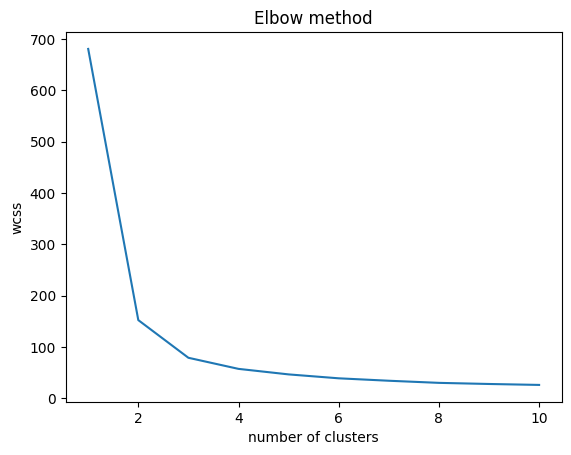

In [13]:
x = df.iloc[:,[0,1,2,3]].values

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter = 300, n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans1 = kmeans.fit_predict(x)

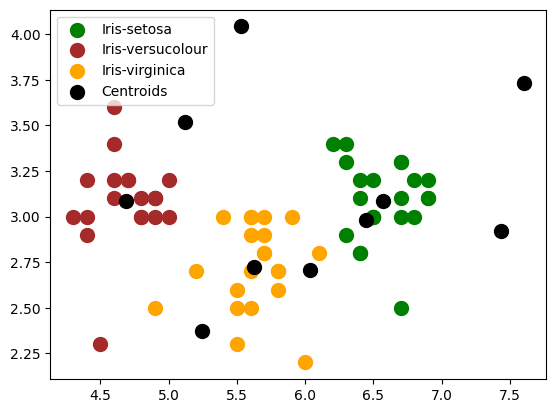

In [15]:
plt.scatter(x[y_kmeans1 == 0,0], x[y_kmeans1 == 0,1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans1 == 1,0], x[y_kmeans1 == 1,1], s = 100, c = 'brown', label = 'Iris-versucolour')
plt.scatter(x[y_kmeans1 == 2,0], x[y_kmeans1 == 2,1], s = 100, c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

In [17]:
df['clusters'] = kmeans.labels_
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,8
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,8
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,5
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0
